<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pennylane --upgrade

In [2]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

**Introduction to Grover Search**

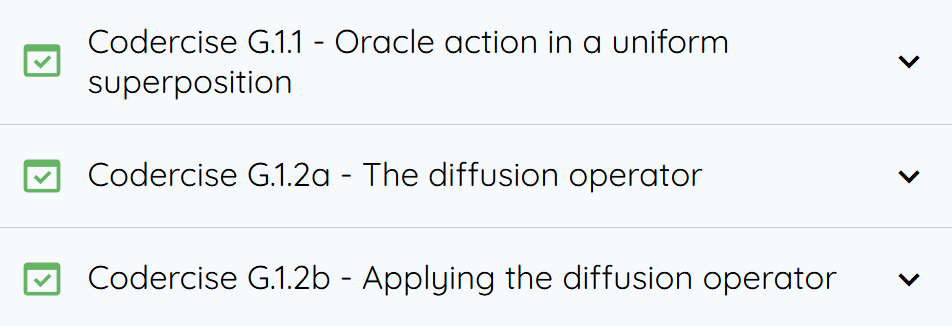

**Q1**

In [3]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    for wire in range(n_bits):
        qml.Hadamard(wire)
    qml.QubitUnitary(oracle_matrix(combo),range(n_bits))

    return qml.state()

**Q2**

In [4]:
n_bits = 4


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    psi = 1/np.sqrt(2**n_bits)*np.ones(2**n_bits)
    return 2*np.outer(psi,psi)-np.identity(2**n_bits)


@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for wire in range(n_bits):
        qml.Hadamard(wire)
    qml.QubitUnitary(oracle_matrix(combo),range(n_bits))
    qml.QubitUnitary(diffusion_matrix(),range(n_bits))

    return qml.state()

**Q3**

In [5]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The resulting quantum state.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
	    qml.Hadamard(wires=i)
    qml.QubitUnitary(oracle_matrix(combo),range(n_bits))
    qml.QubitUnitary(diffusion_matrix(),range(n_bits))
    qml.QubitUnitary(oracle_matrix(combo),range(n_bits))
    qml.QubitUnitary(diffusion_matrix(),range(n_bits))

    return qml.state()

**Searching with Geometry**

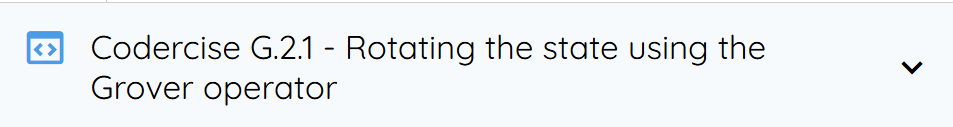

**Q1**

In [6]:
n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1 / 2**n_bits) * np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return 2 * psi_piece - ident_piece


@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns:
        array[complex]: The quantum state (amplitudes) after repeated Grover
        iterations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for wire in range(n_bits):
        qml.Hadamard(wire)
    for iteration in range(my_steps):
        qml.QubitUnitary(oracle_matrix(combo),range(n_bits))
        qml.QubitUnitary(diffusion_matrix(),range(n_bits))

    return qml.state()


my_steps = 4 # YOUR STEP NUMBER HERE

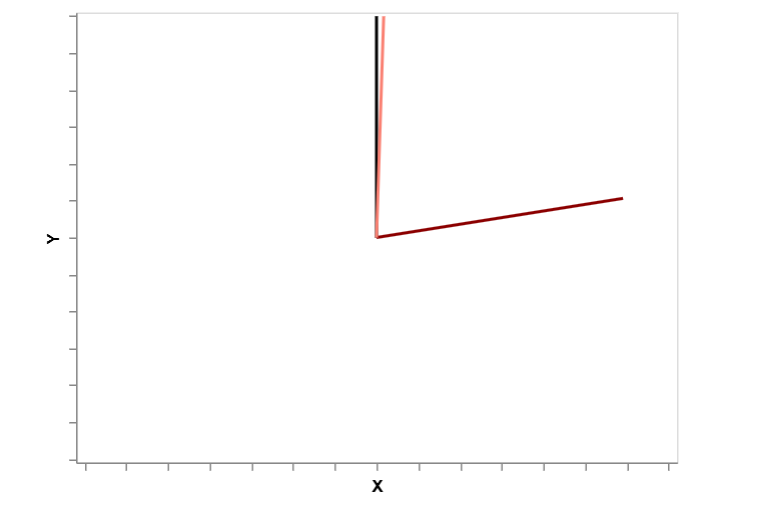

**Searching with Circuits**

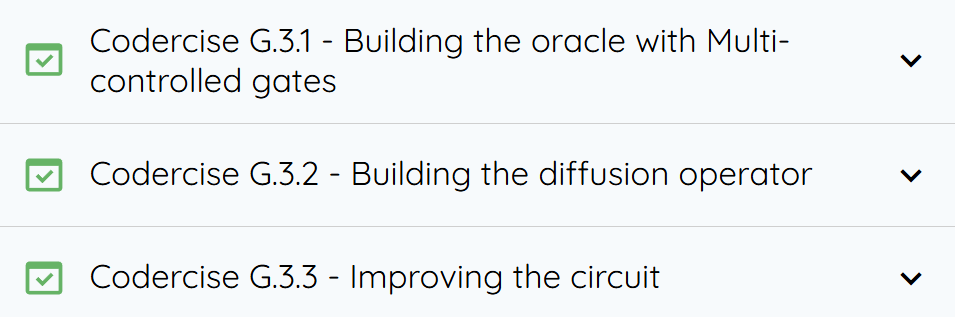

**Q1**

In [7]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = "".join(str(j) for j in combo)
    ##################
    # YOUR CODE HERE #
    ##################
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=combo_str)

    # APPLY MULTI-CONTROLLED X

**Q2**

In [8]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.

    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)


def diffusion():
    """Implement the diffusion operator using the Hadamard transform and
    multi-controlled X."""

    ##################
    # YOUR CODE HERE #
    ##################
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values="0"*len(query_register))
    hadamard_transform(query_register)

**Q3**

In [9]:
@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # PREPARE QUERY AND AUXILIARY SYSTEM
    # APPLY GROVER ITERATION

    qml.PauliX(aux)
    hadamard_transform(all_wires)
    oracle(combo)
    diffusion()

    return qml.probs(wires=query_register)